# Phasing Retrieval Development
In this notebook, the threoy and application of HIO will be developed.

In [10]:
# Load necessary packages
import numpy as np
import numpy.fft as fft

import skimage.measure as sm

import matplotlib.pyplot as plt
import scipy.misc as misc
from math import pi

## Load the demo image

The image size is 217 by 163


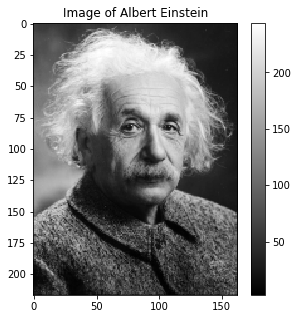

In [16]:
#Read in source image
source = plt.imread("./Albert_Einstein_Head.jpg",format="jpg")

# Because the original image is too large downsample the image by a factor of 20
source = sm.block_reduce(source, (20,20), np.mean)

#Show this figure
fig = plt.figure(figsize=(5,5))
plt.imshow(source, cmap = "gray")
plt.colorbar()
plt.title("Image of Albert Einstein")
print("The image size is %d by %d"%(source.shape[0], source.shape[1]))

## Simulate the oversampling

The image size is 651 by 597


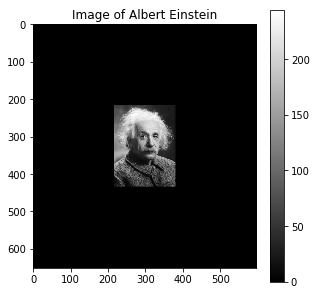

In [17]:
#Pad image to simulate oversampling

## pad_len is the size of the support
pad_len = len(source)
padded = np.pad(source, ((pad_len, pad_len),(pad_len, pad_len)), 'constant', 
                constant_values=((0,0),(0,0)))

#Show this figure
fig = plt.figure(figsize=(5,5))
plt.imshow(padded, cmap="gray")
plt.colorbar()
plt.title("Image of Albert Einstein")
print("The image size is %d by %d"%(padded.shape[0], padded.shape[1]))

The image size is 651 by 651


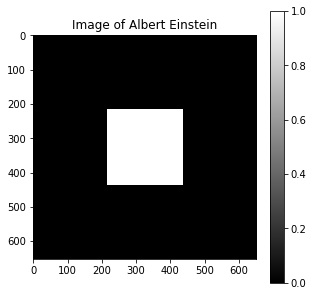

In [21]:
# Calculate the fourier transformation
ft = fft.fft2(padded)

#simulate diffraction pattern
magnitude = np.abs(ft)

length, width = padded.shape

#keep track of where the image is vs the padding
mask = np.ones((pad_len+2,pad_len+2))
mask = np.pad(mask, ((pad_len-1, pad_len-1),(pad_len-1, pad_len-1)), 'constant', 
                constant_values=((0,0),(0,0)))

#Show this mask
fig = plt.figure(figsize=(5,5))
plt.imshow(mask, cmap="gray")
plt.colorbar()
plt.title("Image of Albert Einstein")
print("The image size is %d by %d"%(mask.shape[0], mask.shape[1]))

In [23]:
#Initial guess using random phase info
guess = diffract * np.exp(1j * np.random.rand(length,width) * 2 * pi)

#number of iterations
r = 801

#step size parameter
beta = 0.8

#Finishes the first round because it's different from the other round
prev = None

# Begin the loop
for s in range(0,r):
    #apply fourier domain constraints
    update = diffract * np.exp(1j * np.angle(guess)) 
    
    inv = fft.ifft2(update)
    inv = np.real(inv)
    if prev is None:
        prev = inv
        
    #apply real-space constraints
    temp = inv
    
    ## This part need to be vectorize
    for i in range(0,length):
        for j in range(0,width):
            #image region must be positive
            if inv[i,j] < 0 and mask[i,j] == 1:
                inv[i,j] = prev[i,j] - beta*inv[i,j]
            #push support region intensity toward zero
            if mask[i,j] == 0:
                inv[i,j] = prev[i,j] - beta*inv[i,j]
    
    
    prev = temp
    
    guess = fft.fft2(inv)
        
    #save an image of the progress
    if s % 10 == 0:
        misc.imsave("./save/progress" + str(s) +
                    ".png", prev)
        print(s)

/home/haoyuan/software/anaconda2/envs/Phasing-dev/lib/python2.7/site-packages/ipykernel_launcher.py:42: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
